# Titanic Classifier

As the starting project for most machine learning practioners, this project aims to make a classifier that predicts whether individuals on the titanic lived or died based on certain personal characteristics. (age, sex, siblings, etc.)

# Preprocessing

Import the titanic dataset and clean it.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os


In [2]:
#Remove irrelevent features, fill NaN, reset index, set dtypes
titanic = pd.read_csv('titanic_train.csv')
del titanic['Name']
del titanic['Cabin']
del titanic['Ticket']
titanic = titanic.set_index('PassengerId')
titanic = titanic.dropna()
titanic.Age = titanic.Age.astype('int64')

titanic.head()

"""
#method to perform onehotencoding within pandas
titanicdumm = pd.get_dummies(titanic)
titanicdumm.head()

x= pd.cut(titanic.Fare, [0,15,31,150, 600], labels = [0, 1, 2, 3])
x = pd.get_dummies(x)
x.columns  = ['poor','middle', 'rich', 'moneybags']
frames = [titanicdumm, x]
titanic = pd.concat(frames, axis = 1)
del titanic['Fare']
titanic.head()"""

#Change categorical variables to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic.Sex = le.fit_transform(titanic.Sex)
titanic.Embarked = le.fit_transform(titanic.Embarked)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22,1,0,7.2500,2
2,1,1,0,38,1,0,71.2833,0
3,1,3,0,26,0,0,7.9250,2
4,1,1,0,35,1,0,53.1000,2
5,0,3,1,35,0,0,8.0500,2


Lets do some preliminary visualization to get a feel for our data. We are looking out for linear dependencies and possible feature interactions.

# Data Analysis

In [3]:
df = titanic.drop(['Pclass','Parch','Fare'], axis = 1)

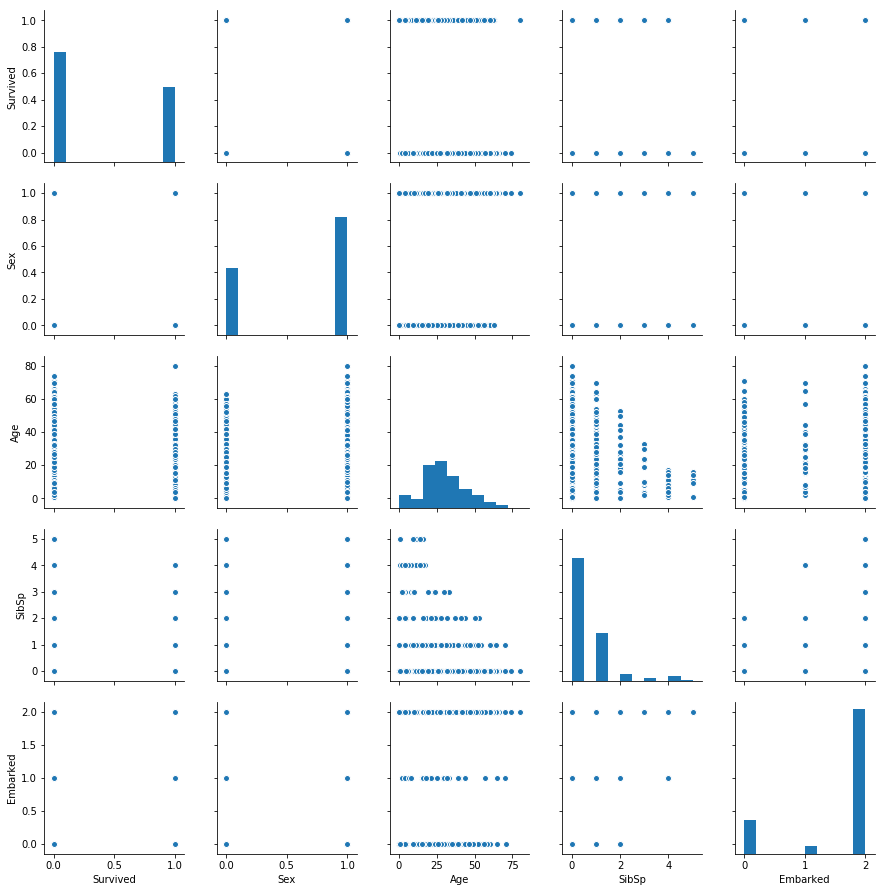

In [4]:
sns.pairplot(df)

### Things to look at:

Look at the distribution of age... a lot of babies.

In [5]:
dead_subframe = df[df.Survived == 0]

fig = plt.figure(figsize = (20, 15))
sns.set_style('dark')

ax1 = plt.subplot2grid((3,2),(0,0))
sns.barplot(x = df.Survived.value_counts().index, y = df.Survived.value_counts(), alpha = 0.67, color ='pink')
plt.title('Distribution of Survival')


sns.barplot(x = df.Survived.value_counts().index, y = df.Survived.value_counts(), alpha = 0.67)
plt.title('Distribution of Survival')
ax1.set_xticklabels(['Dead', 'Alive'], fontsize=10)


ax2 = plt.subplot2grid((3,2),(0,1))
sns.distplot(df.Age, )
plt.title('Distribution of Passengers by Age')

ax3 = plt.subplot2grid((3,2), (1,0))
sns.barplot(x = df.SibSp.value_counts().iloc[:2].index, y = df.SibSp.value_counts().iloc[:2], label = 'alive', color = 'blue', alpha = 0.5 )
    
sns.barplot(x = dead_subframe.SibSp.value_counts().iloc[:2].index, y = dead_subframe.SibSp.value_counts().iloc[:2],label = 'dead', color = 'black')
plt.title('Survival Classification by Sibling-Spouse (0-1)')
ax3.legend( loc="best", frameon=True)
plt.xlabel('# of Siblings and Spouses')



ax4 = plt.subplot2grid((3,2), (1,1))
sns.barplot(x = df.SibSp.value_counts().iloc[2:].index, y = df.SibSp.value_counts().iloc[2:], label = 'alive', color = 'blue', alpha = 0.5 )
    
sns.barplot(x = dead_subframe.SibSp.value_counts().iloc[2:].index, y = dead_subframe.SibSp.value_counts().iloc[2:],label = 'dead', color = 'black')
plt.title('Survival Classification by Sibling-Spouse (2-5)')
ax4.legend( loc="best", frameon=True)
plt.xlabel('# of Siblings and Spouses')


plt.show()

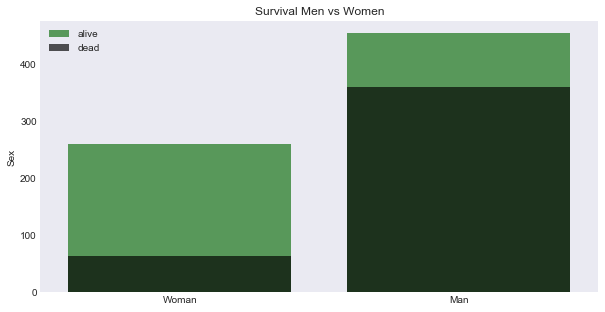

In [7]:
fig = plt.figure(figsize = (10,5))
ax = plt.subplot()
sns.barplot(x = df.Sex.value_counts().index, y = df.Sex.value_counts(), alpha = 0.67,label = 'alive', color = 'green' )
plt.title('Distribution of Survival')


sns.barplot(x = dead_subframe.Sex.value_counts().index, y = dead_subframe.Sex.value_counts(), alpha = 0.67, label = 'dead',color = 'black')
plt.title('Survival Men vs Women')
ax.set_xticklabels(['Woman', 'Man'], fontsize=10)
ax.legend(loc = 'best')
plt.show()

# Logisitic Regression

### Dump all the data into a logistic regression classifier

In [8]:
#Use all features in train test split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X = titanic.iloc[:,1:]
y = titanic.iloc[:,0]
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.1)

#instantiate logistic regressor and fit to training data. Accuracy_score is testing measure.
from sklearn.linear_model import LogisticRegression
log  = LogisticRegression(random_state = 0)
c= cross_val_score(log, X, y, cv = 10).mean()
print('Logistic Regression Out of Sample Accuracy:', c*100, '%')

Logistic Regression Out of Sample Accuracy: 78.1311431624 %


### Will changing feature inputs boost accuracy?

Use random choice of 2 or 3 features, score the fitted model, and ouput the results.



In [9]:
all_features = list(range(0,7))
res = 0
cols = None
#10 models of 3 features each.
for _ in range(0,10):
    x = list(np.random.choice(all_features, 3, replace = False))
    l = LogisticRegression()
    t=  cross_val_score(l, X.iloc[:, x], y, cv = 10).mean()
    if t > res:
        res = t
        cols = X.iloc[:,x].columns.values
    if t == res:
        print('Other winners:', X.iloc[:,x].columns.values, 'at', t)
        
print("The heighest scoring 3 feature combo: ", cols, res)

Other winners: ['Parch' 'Pclass' 'SibSp'] at 0.693857982295
Other winners: ['Age' 'Fare' 'Sex'] at 0.78289720696
Other winners: ['Parch' 'Pclass' 'Sex'] at 0.784460470085
The heighest scoring 3 feature combo:  ['Parch' 'Pclass' 'Sex'] 0.784460470085


In [10]:
res = 0
cols = None
#30 models of 2 features each.
for _ in range(0,30):
    x = list(np.random.choice(all_features, 2, replace = False))
    l = LogisticRegression()
    t=  cross_val_score(l, X.iloc[:,x], y, cv = 10).mean()
    if t > res:
        res = t
        cols = X.iloc[:,x].columns.values
    if t == res:
        print('Other winners:', X.iloc[:,x].columns.values, 'at', t)
        
print("The heighest scoring 2 feature combo: ", cols, res)

Other winners: ['Fare' 'SibSp'] at 0.662458409646
Other winners: ['Sex' 'Embarked'] at 0.784460470085
Other winners: ['Sex' 'Parch'] at 0.784460470085
Other winners: ['Sex' 'Parch'] at 0.784460470085
Other winners: ['Sex' 'Age'] at 0.784460470085
Other winners: ['Sex' 'Embarked'] at 0.784460470085
Other winners: ['Sex' 'Pclass'] at 0.784460470085
Other winners: ['Sex' 'Pclass'] at 0.784460470085
The heighest scoring 2 feature combo:  ['Sex' 'Embarked'] 0.784460470085


## Final Logistic Regression

I will choose a logistic regression with the features [Sex, Sibsp]. Mainly because: they scored well consistently, its a simple model, and it can be visualized.

In [11]:
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X.loc[:,['Sex','SibSp']], y)
logistic_classifier.score(X_test.loc[:,['Sex', 'SibSp']], y_test)

0.73611111111111116

## Visualized
Here is the decision boundary for our linear classifier.

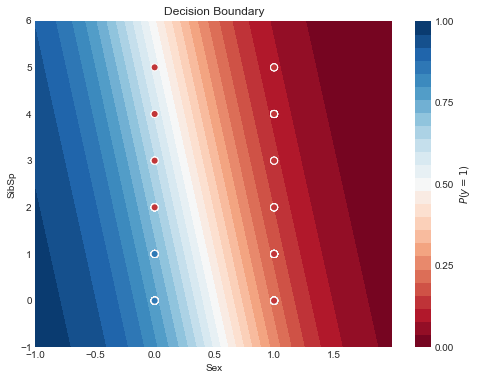

In [12]:
os.chdir('C:\\Users\\Harrison\\Documents\\GitHub\\ML-Notes')
from VisualFuncs import Visual_Logistic
Visual_Logistic(X.iloc[:,[1,3]], y, logistic_classifier)

## With LDA
Can we improve the model by Linear Discriminant Analysis at the cost of interpretability?
Probably not since we are dealing with a bunch of categorical data, but it is good practice, so lets do it.


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
X_lda = lda.transform(X)



l = LogisticRegression(random_state = 0)

b= cross_val_score(l, X_lda, y, cv = 10).mean()

print('old score: ', c)
print('new score: ', b)


old score:  0.781311431624
new score:  0.792250457875


Cool

# Decision Trees

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0)
a = cross_val_score(tree, X, y, cv = 10).mean()
print ('Decision Tree Accuracy on Train Set', a*100, '%')

Decision Tree Accuracy on Train Set 75.3063949939 %


In [15]:
res = 0
cols = None
#10 models of 3 features each.
for _ in range(0,10):
    x = list(np.random.choice(all_features, 3, replace = False))
    l = DecisionTreeClassifier()
    t=  cross_val_score(l, X.iloc[:,x], y, cv = 10).mean()
    if t > res:
        res = t
        cols = X.iloc[:,x].columns.values
    if t == res:
        print('Other winners:', X.iloc[:,x].columns.values, 'at', t)
        
print("The heighest scoring 3 feature combo: ", cols, res)

Other winners: ['Fare' 'Parch' 'Sex'] at 0.770399496337
The heighest scoring 3 feature combo:  ['Fare' 'Parch' 'Sex'] 0.770399496337


In [16]:
res = 0
cols = None
#30 models of 2 features each.
for _ in range(0,30):
    x = list(np.random.choice(all_features, 2, replace = False))
    l = DecisionTreeClassifier()
    t=  cross_val_score(l, X.iloc[:,x], y, cv = 10).mean()
    if t > res:
        res = t
        cols = X.iloc[:,x].columns.values
    if t == res:
        print('Other winners:', X.iloc[:,x].columns.values, 'at', t)
        
print("The heighest scoring 2 feature combo: ", cols, res)

Other winners: ['SibSp' 'Embarked'] at 0.595412851038
Other winners: ['Fare' 'Sex'] at 0.776673534799
Other winners: ['Fare' 'Sex'] at 0.776673534799
Other winners: ['Pclass' 'Sex'] at 0.792346611722
The heighest scoring 2 feature combo:  ['Pclass' 'Sex'] 0.792346611722


## Final Decision Tree Classifier

Sex and Pclass

In [17]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X.loc[:,['Sex', 'Pclass']], y)
c = tree.score(X_test.loc[:,['Sex', 'Pclass']], y_test)
print('Decision Tree Out of Sample Accuracy:', c*100, '%')




Decision Tree Out of Sample Accuracy: 77.7777777778 %


KeyError: None

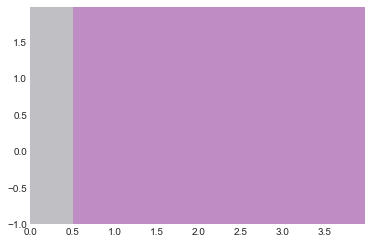

In [18]:
from VisualFuncs import VDR
VDR(X.values, y, tree)